In [1]:
!pip install seaborn
!pip install sklearn
!pip install numpy

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression

In [3]:
# pre-setting the NAN values;
df=pd.read_csv('../data/Attrition.csv',na_values=['NAN','NaN'])

### Preprocessing

In [4]:
df.shape

(1470, 33)

In [5]:
# checking the NAN
df.isna().sum()

Attrition                   0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            5
Education                   1
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  5
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               5
MonthlyRate                 5
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int

In [6]:
# checking if any cell is empty:
df.isnull().sum().head()

Attrition         0
Age               0
BusinessTravel    0
DailyRate         0
Department        0
dtype: int64

In [7]:
# Removing Nan with their
df['Education']=df['Education'].fillna(min(df['Education'].values.tolist()))
df['DistanceFromHome']=df['DistanceFromHome'].fillna(min(df['DistanceFromHome'].values.tolist()))
df['HourlyRate']=df['HourlyRate'].fillna(min(df['HourlyRate'].values.tolist()))
df['MonthlyIncome']=df['MonthlyIncome'].fillna(min(df['MonthlyIncome'].values.tolist()))
df['MonthlyRate']=df['MonthlyRate'].fillna(min(df['MonthlyRate'].values.tolist()))

In [8]:
df.head(10)

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,41,Travel_Rarely,1102,Sales,1.0,2.0,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,No,49,Travel_Frequently,279,Research & Development,8.0,1.0,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,Yes,37,Travel_Rarely,1373,Research & Development,2.0,2.0,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,No,33,Travel_Frequently,1392,Research & Development,3.0,4.0,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,No,27,Travel_Rarely,591,Research & Development,2.0,1.0,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2
5,No,32,Travel_Frequently,1005,Research & Development,2.0,2.0,Life Sciences,8,4,...,3,3,0,8,2,2,7,7,3,6
6,No,59,Travel_Rarely,1324,Research & Development,3.0,3.0,Medical,10,3,...,4,1,3,12,3,2,1,0,0,0
7,No,30,Travel_Rarely,1358,Research & Development,24.0,1.0,Life Sciences,11,4,...,4,2,1,1,2,3,1,0,0,0
8,No,38,Travel_Frequently,216,Research & Development,23.0,3.0,Life Sciences,12,4,...,4,2,0,10,2,3,9,7,1,8
9,No,36,Travel_Rarely,1299,Research & Development,1.0,3.0,Medical,13,3,...,3,2,2,17,3,2,7,7,7,7


In [9]:
# rechecking if all the Nan got resolved
df.isna().sum()

Attrition                   0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int

In [10]:
# for i in range(33):
#     print(f'{df[df.columns[i]].name} : {df[df.columns[i]].unique()}')
datafr=[]
for i in df.columns:
    datafr.append([i, df[i].nunique(), df[i].drop_duplicates().values])
pd.DataFrame(datafr, columns = ['Features', 'Unique Number', 'Values'])

,Features,Unique Number,Values
0,Attrition,2,"[Yes, No]"
1,Age,43,"[41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 2..."
2,BusinessTravel,3,"[Travel_Rarely, Travel_Frequently, Non-Travel]"
3,DailyRate,886,"[1102, 279, 1373, 1392, 591, 1005, 1324, 1358,..."
4,Department,3,"[Sales, Research & Development, Human Resources]"
5,DistanceFromHome,29,"[1.0, 8.0, 2.0, 3.0, 24.0, 23.0, 16.0, 15.0, 2..."
6,Education,5,"[2.0, 1.0, 4.0, 3.0, 5.0]"
7,EducationField,6,"[Life Sciences, Other, Medical, Marketing, Tec..."
8,EmployeeNumber,1470,"[1, 2, 4, 5, 7, 8, 10, 11, 12, 13, 14, 15, 16,..."
9,EnvironmentSatisfaction,4,"[2, 3, 4, 1]"


In [11]:
data=df.Attrition.values.tolist()
df.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [12]:
df.value_counts(normalize = True)

Attrition  Age  BusinessTravel  DailyRate  Department              DistanceFromHome  Education  EducationField    EmployeeNumber  EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  JobRole                    JobSatisfaction  MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked  Over18  OverTime  PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager
No         18   Non-Travel      287        Research & Development  5.0               2.0        Life Sciences     1012            2                        Male    73.0        3               1         Research Scientist         4                Single         1051.0         13493.0      1                   Y       No        15                 3                  4                         0                 0                  2                      3

##### Checking Missing Data if Any

In [13]:
df.isnull().sum().sort_values(ascending=False).head()

Attrition                  0
MonthlyIncome              0
YearsSinceLastPromotion    0
YearsInCurrentRole         0
YearsAtCompany             0
dtype: int64

In [14]:
df.isna().sum().sort_values(ascending=False).head()

Attrition                  0
MonthlyIncome              0
YearsSinceLastPromotion    0
YearsInCurrentRole         0
YearsAtCompany             0
dtype: int64

#### So there is no missing data ,let's check the data for any outliers and NAN text 

In [15]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.136735,2.911565,1024.865306,2.721769,65.762585,2.729932,2.063946,2.728571,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.080581,1.025377,602.024335,1.093082,20.405257,0.711561,1.106940,1.102846,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1555.750000,4.000000,83.000000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


1) Income related
continuous features - Daily Rate, Hourly Rate, Monthly Income, Monthly Rate
categorical features - Stock Option Level, Job Level, Job Role, Department
2) Job Satisfaction - Job Involvement, Environment Satisfaction, Job Satisfaction, Work Life Balance, RelationShip Satisfaction, Performance Rating, Distance From Home, Percent Salary Hike
3) Demographics - Age, Education, Ed. Field, Gender, Marital Status
4) Work-Place - Years At Company, Years In Current Role, Years Since Last Promotion, Years With Current Manager, Business Travel, Num Companies Worked, Over Time, Total Working Years, Training Times Last Year
and specific category with already redundant variables
5) Others - Emloyee Number, Employee Count, Over 18, Standard Hours

##### Removing the Redundant Columns
##### EmployeeNumber,Over18
##### As employeeno unique to each column and all employee are over 18 

=> Now checking the distribution of datset

In [16]:
df.drop(columns=['EmployeeNumber', 'Over18'], inplace=True)


In [17]:
df.shape

(1470, 31)

In [18]:
df.Attrition.replace(to_replace = dict(Yes = 1, No = 0), inplace = True)

In [19]:
df.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Travel_Rarely,1102,Sales,1.0,2.0,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,0,49,Travel_Frequently,279,Research & Development,8.0,1.0,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,1,37,Travel_Rarely,1373,Research & Development,2.0,2.0,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,0,33,Travel_Frequently,1392,Research & Development,3.0,4.0,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,0,27,Travel_Rarely,591,Research & Development,2.0,1.0,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


### Exploration Data Analysis - exploring the data and checking the distribution

<AxesSubplot:ylabel='BusinessTravel'>

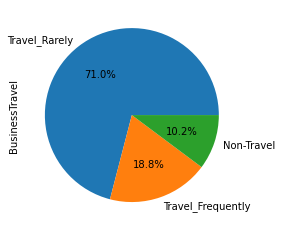

In [20]:
df['BusinessTravel'].value_counts().plot.pie(autopct='%1.1f%%')

<AxesSubplot:ylabel='MaritalStatus'>

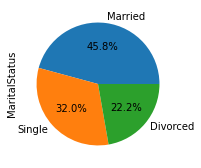

In [21]:
plt.figure(figsize=(23,13))
plt.subplot(1,1,1)
plt.subplot(2,2,2)
plt.subplot(3,3,3)
plt.subplot(4,3,3)
df['MaritalStatus'].value_counts().plot.pie(autopct='%1.1f%%')

<AxesSubplot:ylabel='Gender'>

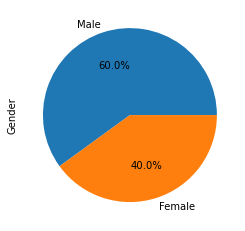

In [67]:
df['Gender'].value_counts().plot.pie(autopct='%1.1f%%')


<AxesSubplot:ylabel='Attrition'>

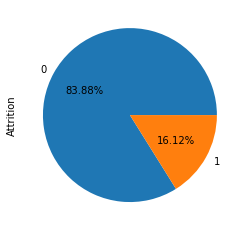

In [24]:
df['Attrition'].value_counts().plot.pie(autopct='%1.2f%%')


##### From the pie chart we are analyzing that around the rate of attrition is 16.12% and 
-------------
##### From Here we are relating the columns with Attrition and checking which column is more affected to attrition

<AxesSubplot:xlabel='Attrition', ylabel='count'>

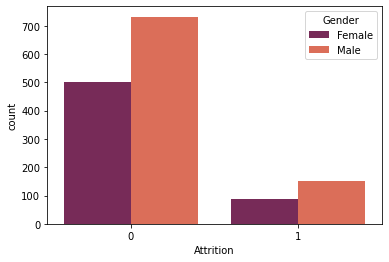

In [25]:

sns.countplot(x='Attrition', hue='Gender', palette = "rocket", data=df)
# Yes-1 No,-2

<AxesSubplot:xlabel='Attrition', ylabel='count'>

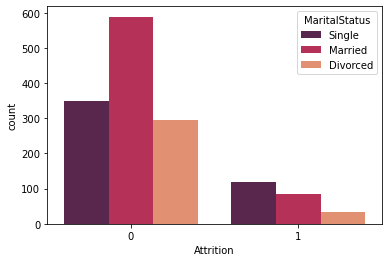

In [26]:
### as you can see the attrition is among male as compared to female

sns.countplot(x='Attrition', hue='MaritalStatus', palette = "rocket", data=df)

##### also it is greater among singles

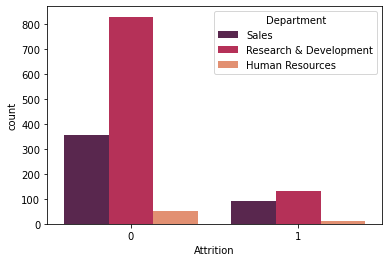

In [27]:
sns.countplot(x='Attrition', hue='Department', palette = "rocket", data=df);

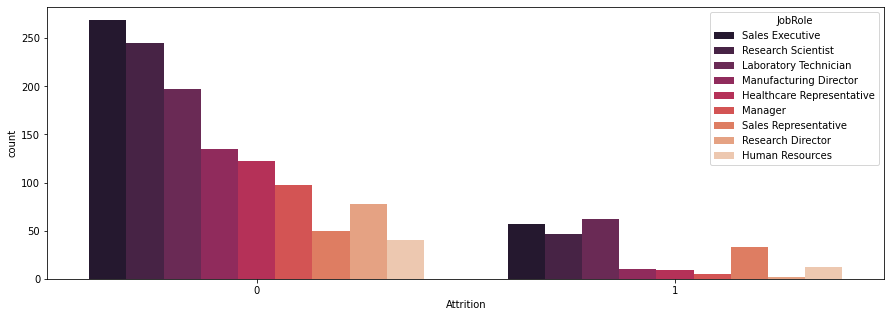

In [48]:
plt.figure(figsize=(15,5))
sns.countplot(x='Attrition', hue='JobRole', palette = "rocket", data=df);

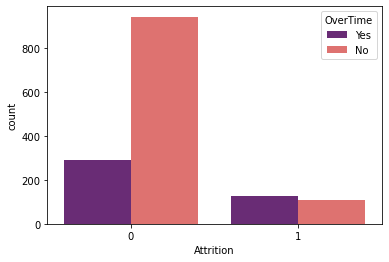

In [32]:
sns.countplot(x='Attrition', hue='OverTime', palette = "magma", data=df);

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Life Sciences'),
  Text(1, 0, 'Other'),
  Text(2, 0, 'Medical'),
  Text(3, 0, 'Marketing'),
  Text(4, 0, 'Technical Degree'),
  Text(5, 0, 'Human Resources')])

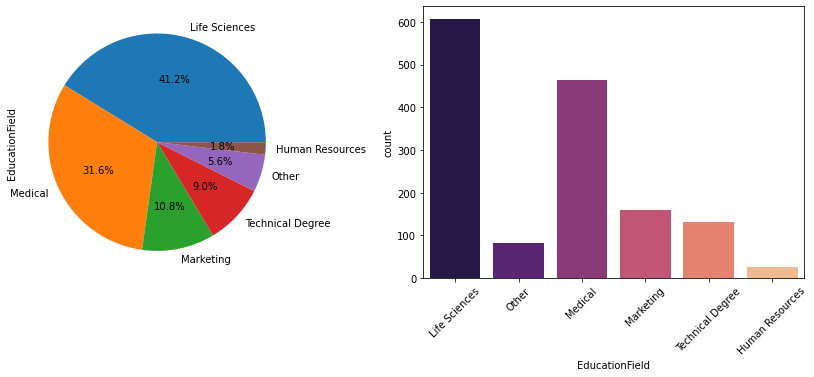

In [64]:
# sns.countplot(x='Attrition', hue='EducationField', palette = "magma", data=df);
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['EducationField'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(x=df['EducationField'],palette = "magma")
plt.xticks(rotation=45)

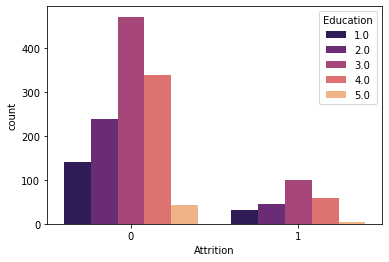

In [34]:
sns.countplot(x='Attrition', hue='Education', palette = "magma", data=df);

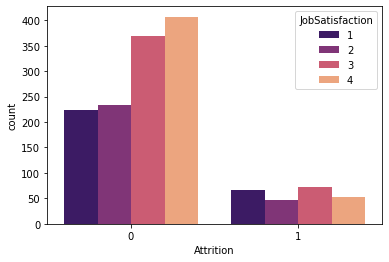

In [36]:
sns.countplot(x='Attrition', hue='JobSatisfaction', palette = "magma", data=df);

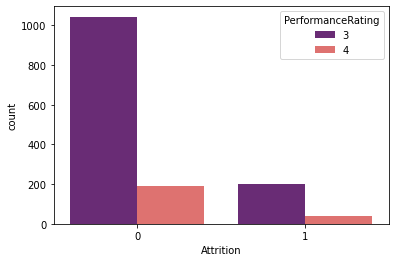

In [37]:
sns.countplot(x='Attrition', hue='PerformanceRating', palette = "magma", data=df);

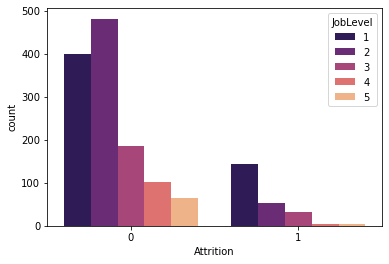

In [38]:
sns.countplot(x='Attrition', hue='JobLevel', palette = "magma", data=df);

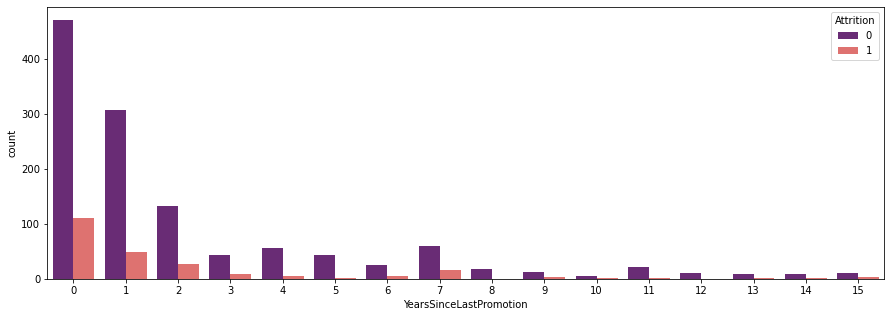

In [49]:
plt.figure(figsize=(15,5))
sns.countplot(x='YearsSinceLastPromotion', hue='Attrition', palette = "magma", data=df);

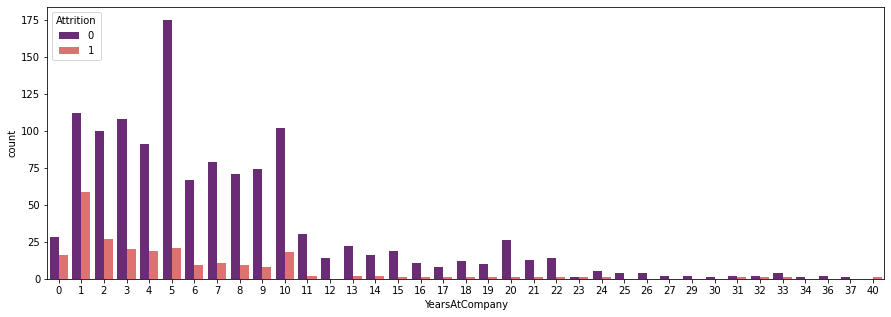

In [47]:
plt.figure(figsize=(15,5))
sns.countplot(x='YearsAtCompany', hue='Attrition', palette = "magma", data=df);

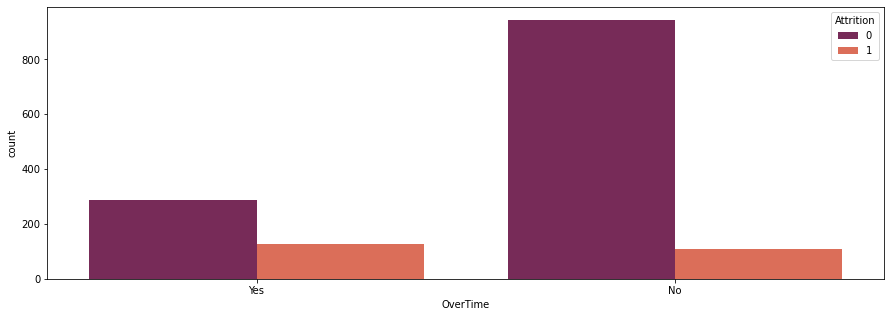

In [74]:
plt.figure(figsize=(15,5))
sns.countplot(x='OverTime', hue='Attrition', palette = "rocket", data=df);

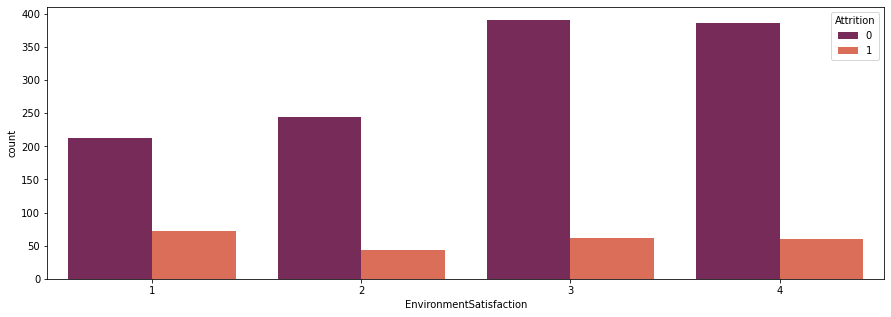

In [73]:
plt.figure(figsize=(15,5))
sns.countplot(x='EnvironmentSatisfaction', hue='Attrition', palette = "rocket", data=df);

Maximum 60
Minimum 18


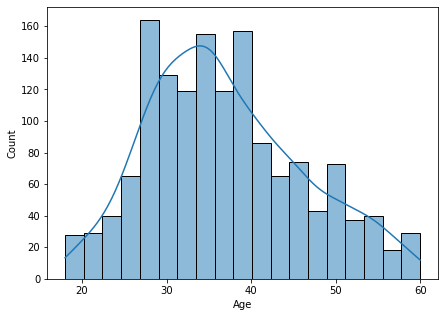

In [75]:
plt.figure(figsize=(7,5))
sns.histplot(df.Age,kde=True,palette='rocket')
print('Maximum',df['Age'].max())
print('Minimum',df['Age'].min())

### Data Processing